# Loan Prediction, A Classification Problem

-  The dataset has 13 columns and 614 rows
-  The dataset has no duplicates 
-  The dataset has 149 `na` values 
-  The column `Loan_ID` is not required for our purpose
-  It is a binary classification problem - whether loan can be given or not


In [1]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

# Load data
DATA_DIR = Path("..") / "Data"
df = pd.read_csv(DATA_DIR / "train.csv")

# Basic inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Remove Columns which are not required 

In [3]:
# remove loan id column which is not required
df.drop(columns=["Loan_ID"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Check Duplicates 


In [4]:
df.duplicated().sum()

0

## Check `nas` of all columns 

In [5]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

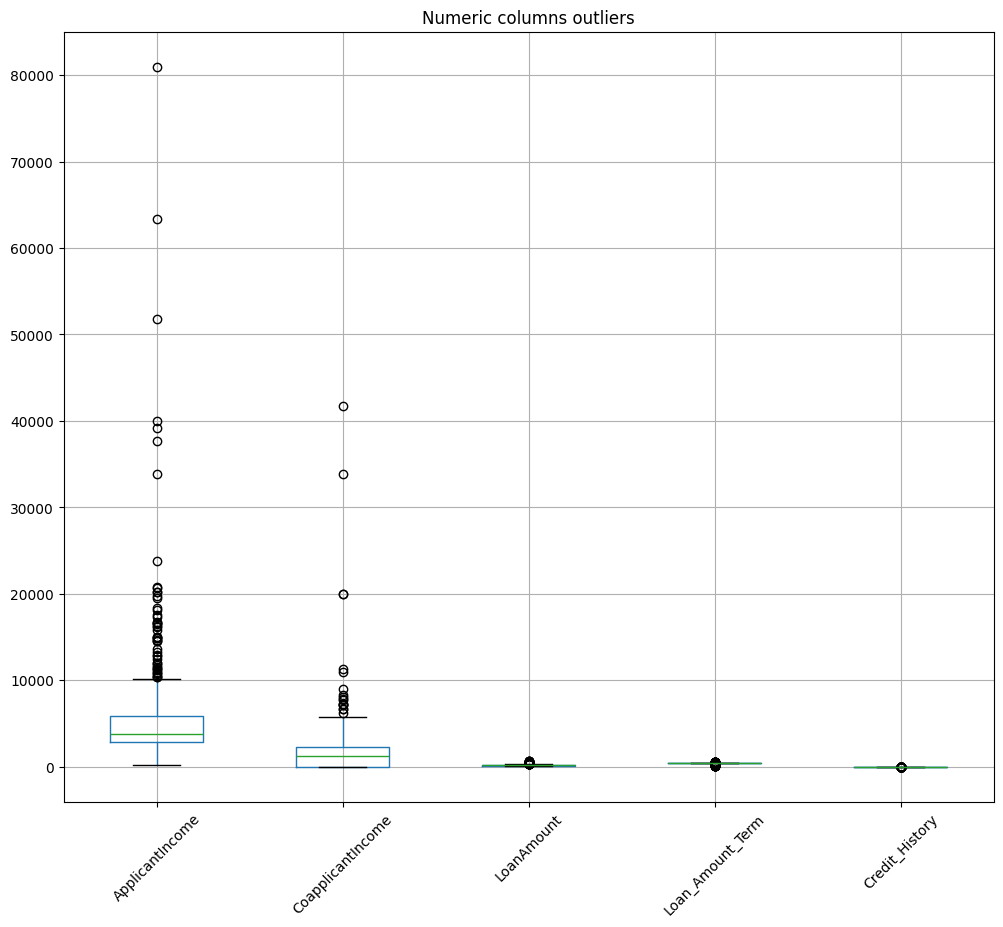

In [6]:
# Check skewness of numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# preview outliers with boxplot
# check and exclude outliers from numeric columns

plt.figure(figsize=(12,10))

df[numeric_cols].boxplot()

plt.xticks(rotation=45)

plt.title('Numeric columns outliers')
plt.show()




In [7]:
skewness = df[numeric_cols].skew().sort_values(ascending=False)

skewness

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.677552
Credit_History      -1.882361
Loan_Amount_Term    -2.362414
dtype: float64

In [ ]:
# Feature engineering BEFORE creating X
df["Dependents"] = df["Dependents"].replace("3+", "3").astype(float)  # treat as numeric ordinal

df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(columns=["ApplicantIncome", "CoapplicantIncome"], inplace=True)  # remove originals — multicollinearity

# Domain-relevant ratio features
df["EMI"] = df["LoanAmount"] / df["Loan_Amount_Term"]
df["Balance_Income"] = df["Total_Income"] - df["EMI"]
df["Loan_to_Income_Ratio"] = df["LoanAmount"] / df["Total_Income"]

# Separate features and target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"].map({"Y": 1, "N": 0})

In [9]:
for column in df.select_dtypes(include="object").columns:
    unique_values = df[column].unique()
    print( f'Column name: {column} - Unique values: {unique_values}' )


Column name: Gender - Unique values: ['Male' 'Female' nan]
Column name: Married - Unique values: ['No' 'Yes' nan]
Column name: Dependents - Unique values: ['0' '1' '2' '3' nan]
Column name: Education - Unique values: ['Graduate' 'Not Graduate']
Column name: Self_Employed - Unique values: ['No' 'Yes' nan]
Column name: Property_Area - Unique values: ['Urban' 'Rural' 'Semiurban']
Column name: Loan_Status - Unique values: ['Y' 'N']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with strafication on y values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
# Credit_History is binary (0/1) — separate it for mode imputation
binary_features = ["Credit_History"]

numeric_features = [
    col for col in X_train.select_dtypes(include=["int64", "float64"]).columns
    if col not in binary_features
]
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", numeric_features)
print("Binary columns:", binary_features)
print("Categorical columns:", categorical_features)

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [ ]:
# Numeric preprocessing (continuous features)
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p)),
    ("scaler", StandardScaler())
])

# Binary preprocessing — Credit_History needs mode imputation, not median
binary_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("bin", binary_transformer, binary_features),
    ("cat", categorical_transformer, categorical_features)
])

In [ ]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"))
])

In [18]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8536585365853658
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

In [ ]:
from sklearn.svm import SVC

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(
        kernel="rbf",
        probability=True,
        random_state=42,
        class_weight="balanced"
    ))
])

svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

param_grid = {"classifier__n_neighbors": [3, 5, 7, 9, 11, 13, 15]}
knn_grid = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best params:", knn_grid.best_params_)
print("Best CV score:", f"{knn_grid.best_score_:.4f}")

knn_model = knn_grid.best_estimator_
knn_pred = knn_model.predict(X_test)

print("\nKNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


Gradient Boosting Accuracy: 0.8211382113821138
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        38
           1       0.83      0.93      0.88        85

    accuracy                           0.82       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



In [25]:
models = {
    "Logistic Regression": model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Gradient Boosting": gb_model
}

for name, m in models.items():
    pred = m.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.8537
Random Forest: 0.8211
SVM: 0.8537
KNN: 0.8618
Decision Tree: 0.7480
Gradient Boosting: 0.8211


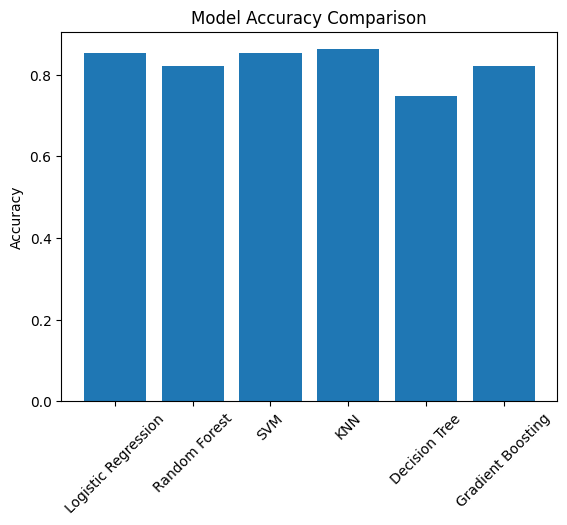

In [26]:
import matplotlib.pyplot as plt

# Collect accuracy scores
model_names = []
accuracies = []

for name, m in models.items():
    pred = m.predict(X_test)
    acc = accuracy_score(y_test, pred)
    model_names.append(name)
    accuracies.append(acc)

# Plot
plt.figure()
plt.bar(model_names, accuracies)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

print("5-Fold Cross-Validation (more reliable than single split)")
print("-" * 50)
for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=5, scoring="accuracy")
    print(f"{name:<22} {scores.mean():.4f}  (+/- {scores.std():.4f})")

In [27]:
knn_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [28]:
import joblib
joblib.dump(knn_model, "Knn_loan_model.pkl")

['Knn_loan_model.pkl']